
The Iris data set is a simple data set that contains information about samples of different species of flower. The question we are trying to answer is: Can we use the measured attributes of the flowers to correctly predict the species? Doing it simply by eye is difficult, as you can see by looking at the images below.

<table>
<thead>
<tr>
<th align="center">Iris Setosa</th>
<th align="center">Iris Versicolor</th>
<th align="center">Iris Virginica</th>
</tr>
</thead>
<tbody>
<tr>
<td align="middle"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" height="200" width = "200"></td>
<td align="middle"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg" height="200" width = "200"></td>
<td align="middle"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg" height="200" width = "200"></td>
</tr>
</tbody>
</table>

### This notebook contains the following content:
* [1. Exploratory Data Analysis](#first-bullet)
* [2. Model Selection](#second-bullet)
* [3. Model Optimisation](#third-bullet)
* [4. A Simple Hypothesis Test](#fourth-bullet)
* [5. Conclusions/Learning Points](#fifth-bullet)

## 1. Exploratory Data Analysis <a class="anchor" id="first-bullet"></a>
The purpose of this section is to get a feel for the data types and distribution of values within the dataset. 

In [1]:
# First import some useful data manipulation and plotting libraries.
# Data manipulation:
import pandas as pd
import numpy as np

#Plotting:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# The Iris data set is built into scikit-learn, so I will import it from there.
from sklearn.datasets import load_iris
# Running the load_iris function returns a dictionary with various fields.
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
# We want to turn this dictionary into a pandas dataframe for ease of use.
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
# Now we need to add the target column.
iris_df['Species'] = iris_data['target']
# This column now has the species encoded as 0, 1 or 2 depending on the species.
# We will replace them with the actual species name for some context on our plots.
map_dict ={}
for target, species in enumerate(iris_data['target_names']):
    map_dict[target] = species
map_dict
# map_dict now contains a mapping from integer targets to target names
iris_df['Species'] = iris_df['Species'].map(map_dict)
iris_df.head(1)
#This format now looks usable for our exploration & analysis.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa


A good place to start would be to check the data type and completeness of each feature.

In [4]:
iris_df.info()
# This command gives basic information about each column in iris_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


We can see that the numeric columns are all floating point numbers whilst the Species is an object (string).  We can also see that there are no null values in any row. If there were any missing values then we would need to choose a strategy for dealing with them.

For the numeric columns, let's check if there are any major outliers.

In [5]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


By comparing the mean/median values with the max and min values, we can see there aren't any values that are off by orders of magnitude or are zero. Because of the source of the data we are unlikely to have any spurious values however it is good practice to check just in case.

Let's also have a quick look at the Species column.

In [6]:
iris_df['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

Great we have an even distribution of the target classes. If we had imbalanced classes this would have implications for our training data preparation and model choice.

So far we have seen that the data seems consistent and is evenly balanced between classes. Let's see what the distribution of variables looks like.

Text(0.5,0.98,'Pair plot of flower dimensions split by Species')

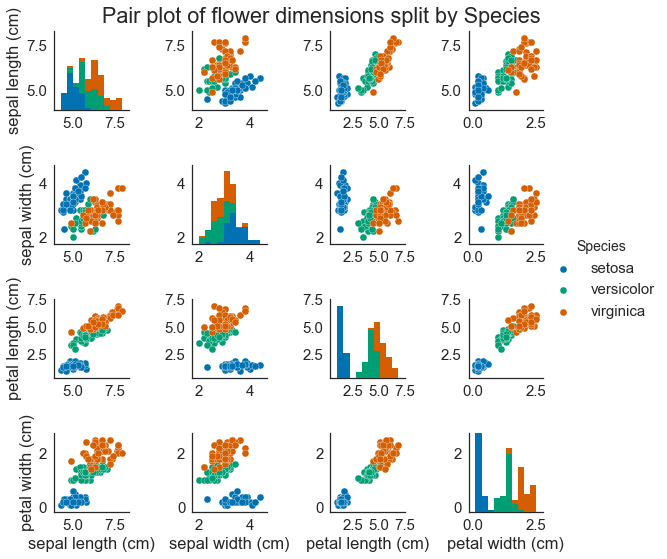

In [7]:
sns.set(font_scale=1.5, palette='colorblind', style='white')
g = sns.pairplot(iris_df, hue='Species', size=2, aspect=1)
g.fig.suptitle('Pair plot of flower dimensions split by Species')

Some comments:
* It is immediately obvious that the *setosa* species is quite easily separated from the other 2 species.
* There is some overlap between the *versicolor* and *virginica* species, which will make them more difficult to completely separate.

Because we have so few features we can look at each one individually. We can plot the distribution of each variable for each target class.

In [8]:
columns = list(iris_df) #Get a list of the column names in the data frame for ease of selection.
setosa = iris_df[iris_df[columns[-1]] == 'setosa'] #dataframe containing only the setosa species.
versicolor = iris_df[iris_df[columns[-1]] == 'versicolor'] #dataframe containing only the versicolor species.
virginica = iris_df[iris_df[columns[-1]] == 'virginica'] #dataframe containing only the virginica species.

Text(0.5,1,'Distribution of sepal length, split by Species')

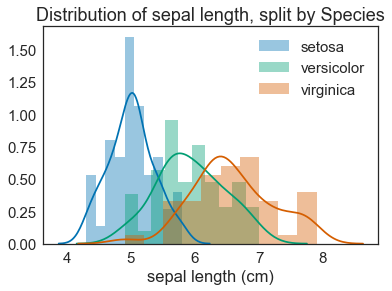

In [9]:
sns.distplot(setosa[columns[0]], label='setosa', bins=10)
sns.distplot(versicolor[columns[0]], label='versicolor', bins=10)
sns.distplot(virginica[columns[0]], label='virginica',bins=10)
plt.legend(loc=1)
plt.title('Distribution of sepal length, split by Species')

Text(0.5,1,'Distribution of sepal width, split by Species')

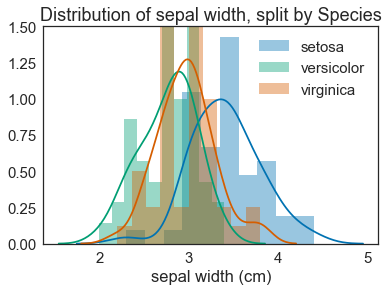

In [10]:
sns.distplot(setosa[columns[1]], label='setosa', bins=10)
sns.distplot(versicolor[columns[1]], label='versicolor', bins=10)
sns.distplot(virginica[columns[1]], label='virginica',bins=10)
plt.legend(loc=1)
plt.title('Distribution of sepal width, split by Species')

Text(0.5,1,'Distribution of petal length, split by Species')

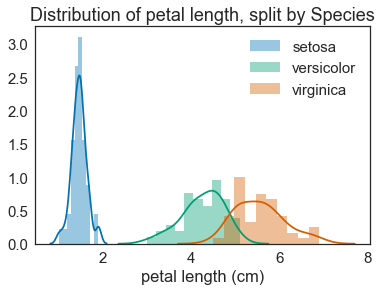

In [11]:
sns.distplot(setosa[columns[2]], label='setosa', bins=10)
sns.distplot(versicolor[columns[2]], label='versicolor', bins=10)
sns.distplot(virginica[columns[2]], label='virginica',bins=10)
plt.legend(loc=1)
plt.title('Distribution of petal length, split by Species')

Text(0.5,1,'Distribution of petal width, split by Species')

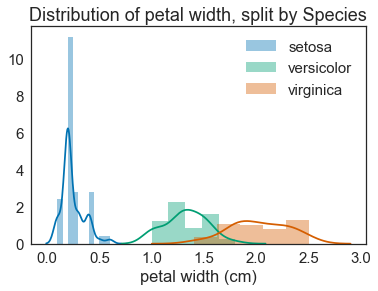

In [12]:
sns.distplot(setosa[columns[3]], label='setosa')
sns.distplot(versicolor[columns[3]], label='versicolor')
sns.distplot(virginica[columns[3]], label='virginica')
plt.legend(loc=1)
plt.title('Distribution of petal width, split by Species')

In general it seems that the measurements for the petal are much more separable than the measurements for the sepal. The distributions within each class also seem to be fairly normally distributed, however with so few values a few bumps in the distribution are to be expected.

## 2. Model Selection <a class="anchor" id="second-bullet"></a>

Now that we have explored the data a little, we need to decide what kind of model we will use to solve our original question (Can we use the measured attributes of the flowers to correctly predict the species?). The following factors are considered:
* Since we are trying to predict a categorical variable (the Species) rather than a continuous variable, this is a **classification** problem.
* The 3 different classes look like they could be pretty accurately separated by linear decision boundaries.
* Since we have 3 classes, this is a multi-classification problem. There are 2 ways to approach this:
  * One vs many: Have 3 models which each split a different class from the other 2. The predictive outcome will be the model which predicts the highest probability.
  * One vs One: Again we have 3 models, but this time each model only includes data from 2 classes. The predictive outcome is a voting scheme between the individual model outcomes.
* The problem is a simple one, and ideally we would like to produce an interpretable rule. Using an extremely complex algorithm such as XGBoost might get a better predictive score but we can't interpret the results.

In [13]:
# Prepare the data for training and testing
# First we split the data into a training and test set
from sklearn.model_selection import train_test_split
np.random.seed(2) #set a random state for reproducible results
X_train, X_test, Y_train, Y_test = train_test_split(iris_df.drop('Species',axis=1), iris_df['Species'], test_size=0.2)
# We have randomly partitioned off 20% of the data to test our models on.

In [14]:
# We will test the following simple models with default parameters and then decide which one to tune.
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # Support Vector Classifier
# Instantiate each of the model classes with default parameters
# All of these algorithms can deal with multi-class problems without the need for explicit handling.
logreg = LogisticRegression()
dtree = DecisionTreeClassifier()
SVclf = SVC()
models = [logreg, dtree, SVclf]

Because we have so little data, we want to make sure that the algorithms do not overfit without looking at our test data.
Cross-validation works by splitting the training data into a number of 'folds', holding 1 fold out and using the other folds to fit the model. The score on the held out set is then kept. This process is repeated until each fold has been the 'test' fold. The average of these scores is then our cross-validated score.

The idea behind this is that a model that overfits to the specific training folds will be penalized because it will not generalize well to the test fold.

In [15]:
from sklearn.model_selection import cross_val_score 
CV_scores = []
for model in models:
    score = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=5) 
    CV_scores.append(score.mean())
# CV_scores now contains the mean cross-validated score of each of the basic models.

In [16]:
for index, model in enumerate(['logreg','dtree','SVclf']):
    print('The CV-score of ' + model + ' is %f' % CV_scores[index]) # Print the list of model names and associated scores.

The CV-score of logreg is 0.950221
The CV-score of dtree is 0.966916
The CV-score of SVclf is 0.973913


The Support Vector Classifier performs best with the default parameters. An accuracy of 97.4% sounds pretty good! Let's see if this translates to the test set that we held out earlier.

In [17]:
SVclf.fit(X_train, Y_train) # Fit to the whole test set this time.
predictions = SVclf.predict(X_test) # Generate predictions on the test set.

Let's evaluate these predictions against the actual values. To do this we can create a confusion matrix.

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('The accuracy score of the standard SVC on the test set was %f' % accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

The accuracy score of the standard SVC on the test set was 0.966667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


The accuracy was 96.7% on the test set. This is slightly lower than we got in the cross-validation procedure. Looking at the confusion matrix shows us why.

The confusion matrix has the real classes as the rows and the predicted classes as the columns. A correct classification will appear in the diagonal (the intersection of the same class' row and column). Incorrect classifications will appear in the off-diagonal cells. 

We can see in the first row that all 14 **setosa** samples were correctly classified as **setosa**. In the second row we see 7 correct classifications of **versicolor** and 1 incorrect classification of **virginica**. The final row shows 8 correct **virginica** classifications.

So out of 30 test data points we only classified one incorrectly, but due to the small size of the dataset this single error is enough to reduce our accuracy by ~3%.

In our exploratory data analysis we saw that the **versicolor** and **virginica** groups were much harder to separate than the **setosa** group, so it makes sense that we might make a mistake in this area.

## 3. Model Optimisation <a class="anchor" id="third-bullet"></a>
The standard Support Vector Classifier has done a very good job of separating the 3 classes. There is very little performance left to gain however it is interesting to check and see if we can improve it.

In [19]:
from sklearn.model_selection import GridSearchCV # Import GridSearch so we can test multiple values for each parameter
SVclf_2 = SVC() # Create a new instance of the classifier
paramgrid = {'C':np.logspace(-3,2, num=40), 'kernel':['linear','poly','rbf','sigmoid'], 'degree':[2,3,4]} # Parameter lists to search over.
# np.logspace gives us values equally space on a log scale
# Create the grid search object, we are interested in the combination with the highest accuracy. Using 5-fold CV to reduce computation time.
SVclf_tuned = GridSearchCV(SVclf_2, paramgrid, scoring='accuracy', cv=5) 
SVclf_tuned.fit(X_train, Y_train) # Fit the search to the training data.
print('The best SVC model achieved a cross-validation score of %f, with C value of %f, %s kernel and degree %d if polynomial' % \
     (SVclf_tuned.best_score_, SVclf_tuned.best_params_['C'],SVclf_tuned.best_params_['kernel'],SVclf_tuned.best_params_['degree']))

The best SVC model achieved a cross-validation score of 0.983333, with C value of 2.894266, linear kernel and degree 2 if polynomial


By using a GridSearch we were able to perform many model fits with different parameters and keep the best score and parameter combination. The C value controls the influence of misclassified points on the cost function that is being optimised. The kernel type controls the function of the input parameters that are used to fit i.e. with a linear kernel, we will always get linear decision boundaries.

The best combination of parameters was automatically refit, so we can create our predictions straight away.

In [20]:
predictions = SVclf_tuned.predict(X_test) # The best model was saved in the SVclf_tuned object
print('The accuracy score of the standard SVC on the test set was %f' % accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

The accuracy score of the standard SVC on the test set was 0.966667
[[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


Because there was only 1 error with the previous model it is difficult to improve upon it. The 1 point that is being misclassified may be an edge case that is quite different to the points that we trained the model on. 

Let's take a look. 

In [21]:
X_test[Y_test != predictions] # dataframe rows where the predicted value does not equal the actual value

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
77,6.7,3.0,5.0,1.7


In [22]:
Y_test[Y_test != predictions] # the label that it should have had

77    versicolor
Name: Species, dtype: object

Text(0.5,1.05,'Test point on distribution of all features for 2 Species')

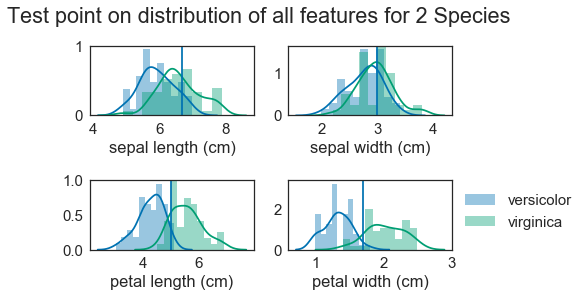

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2) # creating a plot to see where this data point is located in it's class distribution
plt.subplot(ax1)
sns.distplot(versicolor[columns[0]], label='versicolor', bins=10) #distribution of first feature for versicolor
sns.distplot(virginica[columns[0]], label='virginica', bins=10) #distribution of first feature for virginica
plt.axvline(X_test[Y_test != predictions][columns[0]].values) # value of first feature
plt.subplot(ax2)
sns.distplot(versicolor[columns[1]], label='versicolor', bins=10) #distribution of second feature for versicolor
sns.distplot(virginica[columns[1]], label='virginica', bins=10) #distribution of second feature for virginica
plt.axvline(X_test[Y_test != predictions][columns[1]].values) # value of second feature
plt.subplot(ax3)
sns.distplot(versicolor[columns[2]], label='versicolor', bins=10) #distribution of third feature for versicolor
sns.distplot(virginica[columns[2]], label='virginica', bins=10) #distribution of third feature for virginica
plt.axvline(X_test[Y_test != predictions][columns[2]].values) # value of third feature
plt.subplot(ax4)
sns.distplot(versicolor[columns[3]], label='versicolor', bins=10) #distribution of fourth feature for versicolor
sns.distplot(virginica[columns[3]], label='virginica', bins=10) #distribution of fourth feature for virginica
plt.axvline(X_test[Y_test != predictions][columns[3]].values) # value of fourth feature

plt.tight_layout() # Make sure text doesn't overlap
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) # Set legend to appear outside of the plot area.
plt.suptitle('Test point on distribution of all features for 2 Species', y=1.05)

The vertical lines represent the location of the test point that was misclassified in each dimension. It can be seen that the point is closer to the mean of the virginica distribution than versicolor for all of the dimensions,so it is understandable that a model might misclassify it.

For interpretation, it may also be useful to visualise the decision boundary. Because the problem is multi-dimensional it is not possible to visualise on the whole problem, however we can plot 2 dimensions of the data and calculate a decision boundary for that space.

We do this by extracting the coefficients and intercept for each One vs Rest classifier and setting:
intercept + $coefficient_{x}$ x X + $coefficient_{y}$ x Y = 0

And plot a line of Y = -(intercept + $coefficient_{x}$ x X)/$coefficient_{y}$

In [24]:
setosa_coefs = SVclf_tuned.best_estimator_.coef_[0] # Extracts the coefficients for the setosa vs rest model
versicolor_coefs = SVclf_tuned.best_estimator_.coef_[1]
virginica_coefs = SVclf_tuned.best_estimator_.coef_[2]
setosa_intercept = SVclf_tuned.best_estimator_.intercept_[0] # Extracts the intercept for the setosa vs rest model
versicolor_intercept = SVclf_tuned.best_estimator_.intercept_[1]
virginica_intercept = SVclf_tuned.best_estimator_.intercept_[2]
# The sepal length coefficient is coefficient 0, petal length is coefficient 2.
x_values = np.linspace(0,8,200) # create 200 points in the x-range 0 - 8 (roughly the range of petal length)
# Then calculate the y values for the 2 relevant decision boundaries
versicolor_y = -1*(versicolor_intercept + (versicolor_coefs[2] * x_values))/versicolor_coefs[0]
virginica_y = -1*(virginica_intercept + (virginica_coefs[2] * x_values))/virginica_coefs[0]

In [25]:
SVclf_tuned.best_estimator_.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

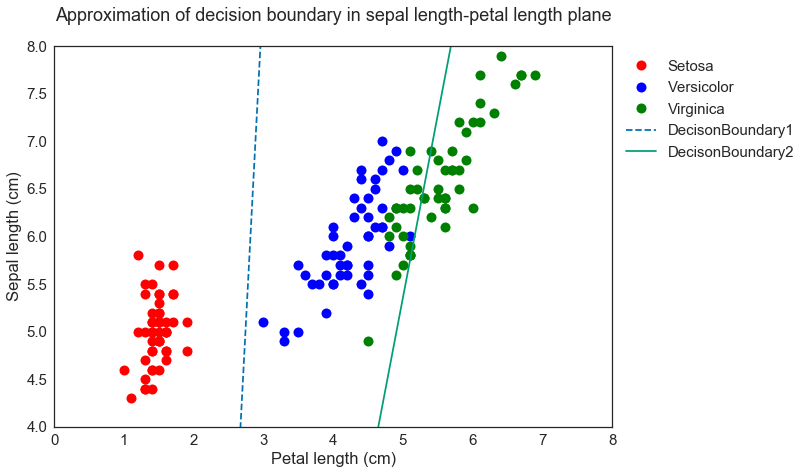

In [26]:
fig = plt.figure(figsize=(10,7))
plt.plot(setosa['petal length (cm)'], setosa['sepal length (cm)'], 'r.',markersize=20, label='Setosa')
plt.plot(versicolor['petal length (cm)'], versicolor['sepal length (cm)'], 'b.',markersize=20, label='Versicolor')
plt.plot(virginica['petal length (cm)'], virginica['sepal length (cm)'], 'g.',markersize=20, label='Virginica')
plt.plot(x_values, versicolor_y, '--', label='DecisonBoundary1')
plt.plot(x_values, virginica_y, '-', label='DecisonBoundary2')
plt.ylim((4,8))
plt.xlim((0,8))
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.title('Approximation of decision boundary in sepal length-petal length plane', y=1.05)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

By flattening the decision boundary onto 2 dimensions we lose some information, however we can see that the Setosa class is easily partitioned off. We can also see that in this 2D space there is some trouble separating Versicolor and Virginica. The full model uses a combination of dimensions to better separate the species.

## 4. A Simple Hypothesis Test <a class="anchor" id="fourth-bullet"></a>
Now that we have a working model we need to answer the question - Is this a good model? To answer this we can compare it to a baseline model. A few options are:
* A random choice model, which would have a 33% chance of getting the species correct. Using this model wouldn't be a good choice because of the balanced nature of the classes.
* From the graphs that we plotted earlier, it is visually obvious that partitioning the data at around Petal Length = 2 cm would split the data into a pure group of Setosa and a 50/50 group of Versicolor and Virginica. In the overall data set this would give a 100% chance of classifying Setosa correctly and a 50% chance of classifying the other 2 species correctly if we were to use random choice.

To answer the question, we need to decide if the improvement in accuracy of our model over the simple model in point 2 above is *statistically significant*. In this case our null hypothesis would be:
* **$h_{0}$** : There is no difference in the predictive power between our SVC model and the model in point 2.

We need to calculate the probability that, assuming our null hypothesis is true, our 96.7% accuracy value would occur.

Since we know in the simple model that the Setosa flowers, of which there are 14 in the test set, 100% will be classified correctly, the variance in the simple model will come from the 50/50 choice on the remaining 16 values.

To find the probability of getting 29 correct choices, we need to compute the following:

* P(X >= 29) = P(X = 29) + P(X = 30) however the 14 data points that are 100% accurate should not be included. Instead we use:
* P(X >= 15) = P(X = 15) + P(X = 16) + ..... or 1 - P(X <= 14) given X ~ B(n=16, p=0.5)

In [27]:
from scipy.stats import binom
x = 14
n = 16
p = 0.5
1 - binom.cdf(x, n, p)

0.0002593994140625

A usual threshold for statistical significance is 5% or a probability of 0.05. The probability we have calculated is 2.6e-4 which is far lower than the usual threshold and we can therefore reject the null hypothesis with some confidence. There is a statistically significant improvement in accuracy by using our SVC model over the simple model

## 5. Conclusions/Learning Points <a class="anchor" id="fifth-bullet"></a>
* We were able to construct a model on the data that was significantly better at classifying the 3 flower species than a simple 'eyeball' model.

* The small size of the dataset requires care when fitting models to avoid overfitting, cross-validation is a good strategy with small datasets because it avoids the need to hold-out 2 sets of data from training.

* Support Vector models are fairly robust to changes in the specific dataset used to fit. This can sometimes come at a cost of incorrectly classifying more training data but can generalize better than other methods.

* Optimising a model with such a small test set can seem pointless when the test accuracy doesn't change, however we saw an improvement in cross-validated accuracy from 0.974 to 0.983. We can have confidence that the optimised model would be more likely to perform better on new, unseen data.

* If the largest value in a particular class in a particular dimension with overlapping classes is randomly assigned to the test set,  like we saw with the consistently misclassified point, training will sometimes not be able to generalise to this point.